In [1]:
# Author-Vishal Burman

## Vanishing Gradients

In [2]:
%matplotlib inline
from mxnet import autograd, nd
import matplotlib.pyplot as plt

In [3]:
x=nd.arange(-8.0, 8.0, 0.1)

In [9]:
x.attach_grad()

In [16]:
# We can see in the below diagram that the gradients of input vanishes when they are small and when they are large
# When training many layers we may find that the gradients are cutoff at some layer

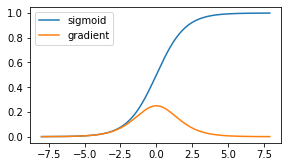

In [15]:
with autograd.record():
    y=x.sigmoid()
y.backward()

plt.figure(figsize=(4.5, 2.5))
plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

## Exploding Gradients

In [18]:
# We take 100 Gaussian random matrices amn multiply with some initial matrix
# We can see that matrix product explodes
# In a deep network if this were to happen, there is no change that gradient descent optimizer would converge

In [17]:
M=nd.random.normal(shape=(4, 4))
print('A single matrix', M)
for i in range(100):
    M=nd.dot(M, nd.random.normal(shape=(4, 4)))
print("After multiplying 100 matrices", M)

A single matrix 
[[ 1.1630785   0.4838046   0.29956347  0.15302546]
 [-1.1688148   1.5580711  -0.5459446  -2.3556297 ]
 [ 0.5414402   2.6785066   1.2546345  -0.54877394]
 [-0.68106437 -0.13531584  0.37723127  0.41016445]]
<NDArray 4x4 @cpu(0)>
After multiplying 100 matrices 
[[-4.36229360e+23  2.73217573e+23  2.72850719e+22  1.44128465e+23]
 [-2.60335988e+24  1.63052702e+24  1.62833607e+23  8.60140043e+23]
 [-2.09754670e+24  1.31372797e+24  1.31196270e+23  6.93021188e+23]
 [ 6.16490259e+23 -3.86118024e+23 -3.85598921e+22 -2.03686012e+23]]
<NDArray 4x4 @cpu(0)>
